<a href="https://colab.research.google.com/github/Imadahmed10/Stock-Market-prediction-using-ML/blob/main/stock_market_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

from datetime import date
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Returns the current local date
today = date.today()

In [ ]:
# We are going to download the dataset from yahoo finances- first we are going to work on Apple(aapl)
aapl = yf.download('AAPL', start='2010-01-01', end=today)
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378827,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367031,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900


In [ ]:
# We only need close column for our predictions.
aapl = aapl[['Close']]
aapl

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2024-04-16,169.380005
2024-04-17,168.000000
2024-04-18,167.039993


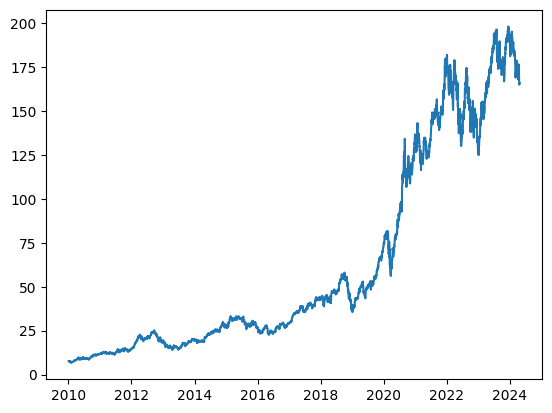

In [ ]:
plt.plot(aapl)

In [ ]:
# we are going to use minmaxscaler to convert our close column between 1 and 0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
aapl = scaler.fit_transform(np.array(aapl).reshape(-1,1))
aapl

array([[0.00410081],
       [0.00416991],
       [0.00353313],
       ...,
       [0.83754336],
       [0.82687678],
       [0.8312689 ]])

In [ ]:
# Now we are going to spilt the data into training and tesing data.
training_size = int(len(aapl)*0.60)
test_size = len(aapl)-training_size
train_data,test_data = aapl[0:training_size,:], aapl[training_size:len(aapl),:1]

In [ ]:
training_size, test_size

(2159, 1440)

In [ ]:
## We are creating a function which will help us in creating data so that we can fit X and Y, train and test
def create_dataset(df , time_step=1):
  dataX, dataY =[],[]
  for i in range(len(df)-time_step-1):
    a = df[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(df[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
# Now we are going to spilt the data into x_train, y_train, x_test and y_test.
time_step=120
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(2038, 120)
(2038,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(1319, 120)
(1319,)


(None, None)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
# We are creating a model using sequential, LSTM and Dense. mainly we are concentrating on LSTM method
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(120,1)))
model.add(LSTM(50,return_sequences=True ))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 120, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=110, batch_size=64, verbose=1)

Epoch 1/110
32/32 [==============================] - 8s 54ms/step - loss: 9.9380e-04 - val_loss: 0.0016
Epoch 2/110
32/32 [==============================] - 1s 20ms/step - loss: 5.5742e-05 - val_loss: 0.0034
Epoch 3/110
32/32 [==============================] - 1s 19ms/step - loss: 3.7213e-05 - val_loss: 0.0034
Epoch 4/110
32/32 [==============================] - 1s 19ms/step - loss: 3.5572e-05 - val_loss: 0.0052
Epoch 5/110
32/32 [==============================] - 1s 19ms/step - loss: 3.5561e-05 - val_loss: 0.0046
Epoch 6/110
32/32 [==============================] - 1s 19ms/step - loss: 3.2924e-05 - val_loss: 0.0037
Epoch 7/110
32/32 [==============================] - 1s 20ms/step - loss: 3.4388e-05 - val_loss: 0.0039
Epoch 8/110
32/32 [==============================] - 1s 19ms/step - loss: 3.3267e-05 - val_loss: 0.0045
Epoch 9/110
32/32 [==============================] - 1s 20ms/step - loss: 3.0938e-05 - val_loss: 0.0027
Epoch 10/110
32/32 [==============================] - 1s 20ms/st

In [ ]:
# now we are going to make prediction for our model
train_predict= model.predict(x_train)
test_predict= model.predict(x_test)

42/42 [==============================] - 0s 7ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#we are now calculating the RMSE for the train predict
math.sqrt(mean_squared_error(y_train,train_predict))

25.961604437329445

In [ ]:
#we are going to calculate the RMSE for the test predict
math.sqrt(mean_squared_error(y_test,test_predict))

130.07153100602588

In [ ]:
len(train_predict), len(test_predict)

(2038, 1319)

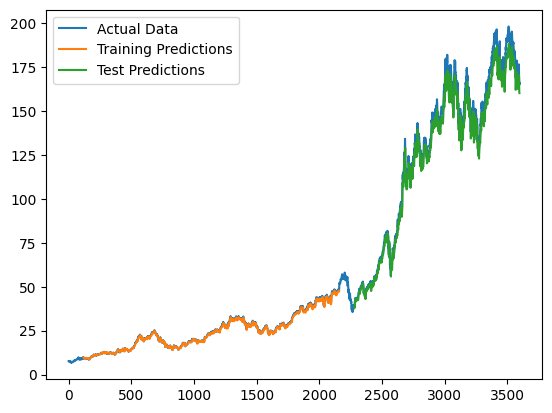

In [ ]:
## now we are going to plot

look_back=120
trainpredictplot = np.empty_like(aapl)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict

testpredictplot = np.empty_like(aapl)
testpredictplot[:, :] =np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(aapl)-1, :] = test_predict

plt.plot(scaler.inverse_transform(aapl), label = 'Actual Data')
plt.plot(trainpredictplot, label= 'Training Predictions')
plt.plot(testpredictplot, label= 'Test Predictions')
plt.legend()
plt.show()

In [ ]:
### Now we are going to predict forr the next 30 days for the each market
#First of all i am going to see the length of our test_data
len(test_data)

1440

In [ ]:
## Now we if we have to predict for the next 30days we will need to see the past 120days data as we have used time_step as 120, so in the code it will be "len(aapl)-120"
# We are going to put this into a new dataset and i am going to name it as X

x_input = test_data[(len(test_data)-120):]

In [ ]:
x_input = x_input.reshape(1,-1)
x_input.shape

(1, 120)

In [ ]:
pred_input = list(x_input)
pred_input = pred_input[0].tolist()
pred_input

[0.8545367243548134,
 0.857046571660144,
 0.8737784881086592,
 0.8926019439782832,
 0.8877914432017685,
 0.9012815732776538,
 0.9148240417041112,
 0.9204187401144264,
 0.9179089725931668,
 0.9387715497492565,
 0.9304056314170344,
 0.9442094724600684,
 0.9471898064320506,
 0.9560787093496387,
 0.9559741124325656,
 0.9651766465332312,
 0.9609413889085835,
 0.9644446276818608,
 0.9574381501353062,
 0.9564969374497895,
 0.9596864652559183,
 0.9543008808956785,
 0.957333553218233,
 0.9640786581482111,
 0.954614591862827,
 0.9754772488029877,
 0.9697256949090984,
 0.9799217002617817,
 0.9874510826096314,
 0.9742223251503226,
 0.982222353732966,
 0.9992157225821285,
 1.0,
 0.997176521511592,
 0.9883922155110771,
 0.9938823967883901,
 0.982849775667263,
 0.9820654184653206,
 0.9764184614885045,
 0.9735426446495243,
 0.9740654696667481,
 0.9763138645714313,
 0.9708236832941184,
 0.9347977445252563,
 0.9275298145780542,
 0.9152946081548341,
 0.9114775786303372,
 0.9343794366410346,
 0.9321833800

In [ ]:
#We are going to make prediction for next 30 days and we are going to put all the output value into an array
output = []
n_steps = 120
i=0
while(i<30):

  if(len(pred_input)>120):
    x_input = np.array(pred_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input =x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    pred_input.extend(yhat[0].tolist())
    pred_input = pred_input[1:]
    output.extend(yhat.tolist())
    i=i+1
  else:
      x_input = x_input.reshape((1, n_steps, 1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      pred_input.extend(yhat[0].tolist())
      print(len(pred_input))
      output.extend(yhat.tolist())
      i=i+1

print(output)

[0.79895175]
121
1 day input [0.85704657 0.87377849 0.89260194 0.88779144 0.90128157 0.91482404
 0.92041874 0.91790897 0.93877155 0.93040563 0.94420947 0.94718981
 0.95607871 0.95597411 0.96517665 0.96094139 0.96444463 0.95743815
 0.95649694 0.95968647 0.95430088 0.95733355 0.96407866 0.95461459
 0.97547725 0.96972569 0.9799217  0.98745108 0.97422233 0.98222235
 0.99921572 1.         0.99717652 0.98839222 0.9938824  0.98284978
 0.98206542 0.97641846 0.97354264 0.97406547 0.97631386 0.97082368
 0.93479774 0.92752981 0.91529461 0.91147758 0.93437944 0.93218338
 0.93767356 0.93453629 0.93626178 0.92428803 0.91932067 0.95043167
 0.96575181 0.97793476 0.98467978 0.98112429 0.9793988  0.97024852
 0.96664068 0.94734666 0.92831409 0.9411768  0.93589581 0.94546432
 0.95393491 0.95451007 0.94881078 0.951582   0.9426931  0.93166048
 0.92700691 0.92549061 0.91738607 0.91346452 0.91743841 0.92815724
 0.91848414 0.91137306 0.9190593  0.9127325  0.90922926 0.90352997
 0.87968698 0.85364785 0.84841912

In [ ]:
new_day = np.arange(1,121)
new_pred = np.arange(121,151)

In [ ]:
len(aapl)

3599

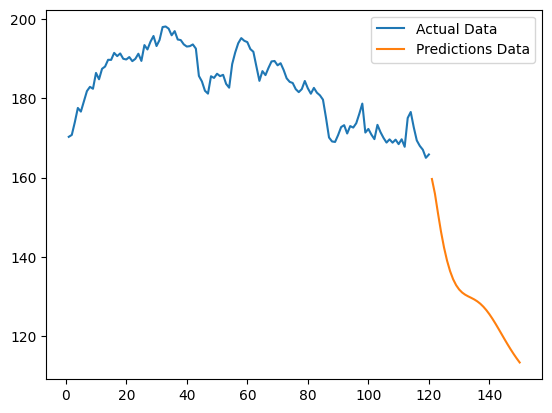

In [ ]:
#Now we are going to plot the actual data and the next 30 days predicted data
plt.plot(new_day,scaler.inverse_transform(aapl[(len(aapl)-120):]), label='Actual Data')
plt.plot(new_pred,scaler.inverse_transform(output), label='Predictions Data')
plt.legend()

2. Now we are going to make predictions for a new company that is Tesla(TSLA)

In [ ]:
### Now we are going to do the same to the next company that is Tesla[TSLA]
# First we are import the data set for the tesla

tsla = yf.download('TSLA', start='2014-01-01', end=today)
tsla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
...,...,...,...,...,...,...
2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,97000000
2024-04-17,157.639999,158.330002,153.779999,155.449997,155.449997,82439700
2024-04-18,151.250000,152.199997,148.699997,149.929993,149.929993,96098800


In [ ]:
# As we only need close column as we are only getting the close column.
tsla = tsla[['Close']]
tsla

,Close
Date,
2014-01-02,10.006667
2014-01-03,9.970667
2014-01-06,9.800000
2014-01-07,9.957333
2014-01-08,10.085333
...,...
2024-04-16,157.110001
2024-04-17,155.449997
2024-04-18,149.929993


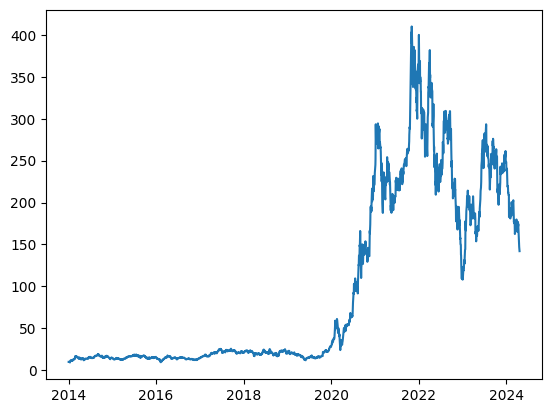

In [ ]:
plt.plot(tsla)

In [ ]:
## We are converting the close column into a array so that it is easy for us to make the changes and make our model run
scaler2 = MinMaxScaler(feature_range=(0,1))
tsla = scaler2.fit_transform(np.array(tsla).reshape(-1,1))

In [ ]:
print(tsla)

[[0.00179029]
 [0.00170044]
 [0.0012745 ]
 ...
 [0.35100435]
 [0.34381661]
 [0.33133785]]


In [ ]:
len(tsla)

2593

In [ ]:
# Now we are going to split the data into training and testing data
training_size2 = int(len(tsla)*0.60)
test_size2 = len(tsla)-training_size2
train_data2,test_data2=tsla[0:training_size2,:],tsla[training_size2:len(tsla),:1]

In [ ]:
training_size2, test_size2

(1555, 1038)

In [ ]:
train_data2

array([[0.00179029],
       [0.00170044],
       [0.0012745 ],
       ...,
       [0.10152058],
       [0.09736764],
       [0.09386361]])

In [ ]:
# Now we are spiltting the data into x_train, y_train, x_test and y_test
time_step = 130
X_train, Y_train = create_dataset(train_data2, time_step)
X_test, Y_test = create_dataset(test_data2, time_step)

In [ ]:
print(X_train.shape), print(Y_train.shape)

(1424, 130)
(1424,)


(None, None)

In [ ]:
print(X_test.shape), print(Y_test.shape)

(907, 130)
(907,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# We are making the model for our data to implement it, we are using mean_squared_error as loss and adam as my optimizer.
model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(130,1)))
model_2.add(LSTM(50, return_sequences=True))
model_2.add(LSTM(50))
model_2.add(Dense(1))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 130, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 130, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=120, batch_size=64, verbose=1)

Epoch 1/120
23/23 [==============================] - 7s 84ms/step - loss: 2.3735e-04 - val_loss: 0.1125
Epoch 2/120
23/23 [==============================] - 1s 22ms/step - loss: 4.9179e-05 - val_loss: 0.0053
Epoch 3/120
23/23 [==============================] - 0s 20ms/step - loss: 2.5912e-05 - val_loss: 0.0046
Epoch 4/120
23/23 [==============================] - 0s 20ms/step - loss: 3.4959e-05 - val_loss: 0.0084
Epoch 5/120
23/23 [==============================] - 0s 20ms/step - loss: 2.3899e-05 - val_loss: 0.0037
Epoch 6/120
23/23 [==============================] - 0s 20ms/step - loss: 2.1546e-05 - val_loss: 0.0047
Epoch 7/120
23/23 [==============================] - 0s 20ms/step - loss: 2.0250e-05 - val_loss: 0.0032
Epoch 8/120
23/23 [==============================] - 0s 20ms/step - loss: 2.0714e-05 - val_loss: 0.0039
Epoch 9/120
23/23 [==============================] - 0s 21ms/step - loss: 2.0077e-05 - val_loss: 0.0033
Epoch 10/120
23/23 [==============================] - 0s 20ms/st

In [ ]:
#We can now predict thr train and test data
train_predict2 = model_2.predict(X_train)
test_predict2 = model_2.predict(X_test)

29/29 [==============================] - 0s 7ms/step


In [ ]:
train_predict2 = scaler2.inverse_transform(train_predict2)
test_predict2 = scaler2.inverse_transform(test_predict2)

In [ ]:
# Now we will calculate the RMSE for the training model
math.sqrt(mean_squared_error(Y_train,train_predict2))

19.319778836457907

In [ ]:
# We will aslo calculate the RMSE for thr test model
math.sqrt(mean_squared_error(Y_test,test_predict2))

227.31649138915284

In [ ]:
len(train_predict2)

1424

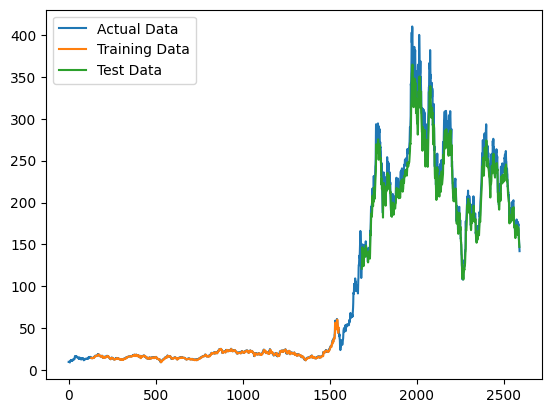

In [ ]:
# Now we will plot the actual data and the predicted data
look_back2=130
trainpredictplot2 = np.empty_like(tsla)
trainpredictplot2[:, :] = np.nan
trainpredictplot2[look_back2:len(train_predict2)+look_back2, :] = train_predict2

testpredictplot2 = np.empty_like(tsla)
testpredictplot2[:, :] = np.nan
testpredictplot2[len(train_predict2)+(look_back2*2)+1:len(tsla)-1, :] = test_predict2

plt.plot(scaler2.inverse_transform(tsla), label='Actual Data')
plt.plot(trainpredictplot2, label='Training Data')
plt.plot(testpredictplot2, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data2)

1038

In [ ]:
1035-130

905

In [ ]:
X_input = test_data2[(len(test_data2)-130):].reshape(1,-1)
X_input.shape

(1, 130)

In [ ]:
input_temp= list(X_input)
input_temp= input_temp[0].tolist()
input_temp

[0.6105377285145565,
 0.6128587986562668,
 0.5824854504929751,
 0.5261563238969621,
 0.5058908212955834,
 0.5061154299306029,
 0.5171965795776007,
 0.5069639768287897,
 0.49034225235829304,
 0.4941857333854183,
 0.4693779419487406,
 0.47806315190902154,
 0.4900926999023278,
 0.5221631037798238,
 0.5257819761719295,
 0.5240599004724407,
 0.5313225129132589,
 0.5311478300023001,
 0.50087433328713,
 0.5125294954732343,
 0.5351410501194385,
 0.569332859324571,
 0.5828847801211228,
 0.5597990643839338,
 0.5615710658074834,
 0.564815552392387,
 0.5787917466380322,
 0.5613464571724638,
 0.5644411665851851,
 0.5660135031946608,
 0.592568314151773,
 0.5861292667060264,
 0.575996515405337,
 0.5728768240895007,
 0.5647656266683262,
 0.5726022897304204,
 0.5742245139817875,
 0.5823856371270228,
 0.5853805331737918,
 0.5751479685071502,
 0.5683345352542017,
 0.5740248491677137,
 0.6033749294396904,
 0.6094895168022958,
 0.605945552037366,
 0.6187737212047983,
 0.5936165258640337,
 0.611985269854964

In [ ]:
# We are making a function to find the next 30 days predicted value for our model and giving them into an array.
lst_output=[]
n_steps=130
i=0
while(i<30):

    if(len(input_temp)>130):
        #print(temp_input)
        X_input=np.array(input_temp[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat2 = model_2.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        input_temp.extend(yhat2[0].tolist())
        input_temp=input_temp[1:]
        #print(temp_input)
        lst_output.extend(yhat2.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat2 = model_2.predict(X_input, verbose=0)
        print(yhat2[0])
        input_temp.extend(yhat2[0].tolist())
        print(len(input_temp))
        lst_output.extend(yhat2.tolist())
        i=i+1


print(lst_output)

[0.32707056]
131
1 day input [0.6128588  0.58248545 0.52615632 0.50589082 0.50611543 0.51719658
 0.50696398 0.49034225 0.49418573 0.46937794 0.47806315 0.4900927
 0.5221631  0.52578198 0.5240599  0.53132251 0.53114783 0.50087433
 0.5125295  0.53514105 0.56933286 0.58288478 0.55979906 0.56157107
 0.56481555 0.57879175 0.56134646 0.56444117 0.5660135  0.59256831
 0.58612927 0.57599652 0.57287682 0.56476563 0.57260229 0.57422451
 0.58238564 0.58538053 0.57514797 0.56833454 0.57402485 0.60337493
 0.60948952 0.60594555 0.61877372 0.59361653 0.61198527 0.60709358
 0.61725127 0.6293058  0.60869086 0.59696083 0.59681109 0.57192843
 0.57063062 0.56953252 0.57691993 0.56321827 0.56067259 0.54390113
 0.5231115  0.52565718 0.5147757  0.50561629 0.50638996 0.49792936
 0.49877791 0.49550848 0.43261551 0.43416286 0.45333023 0.45497744
 0.44424569 0.44816404 0.44579308 0.42869716 0.43878002 0.44496948
 0.44991106 0.45991905 0.44634215 0.43608461 0.44778969 0.47708981
 0.47584193 0.46039322 0.46291395 

In [ ]:
day_new = np.arange(1,131)
day_pred = np.arange(131,161)

In [ ]:
len(tsla)

2593

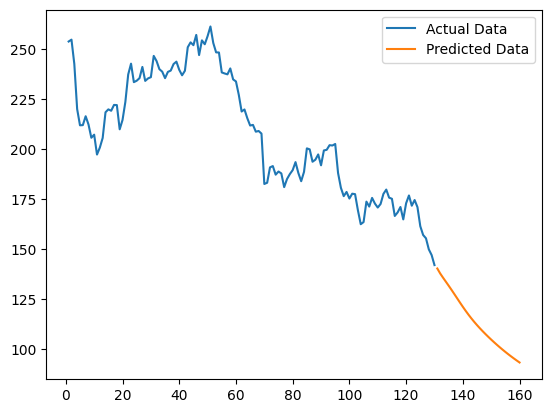

In [ ]:
## Now we are plotting teh actual data and the predicted data for next 30 days.
plt.plot(day_new,scaler2.inverse_transform(tsla[(len(tsla)-130):]), label='Actual Data')
plt.plot(day_pred,scaler2.inverse_transform(lst_output), label='Predicted Data')
plt.legend()

3. Now we are going to make the prediction for the next company that is Amazon(AMZN)

In [ ]:
## First we are import the data from yahoo finances for Amazon(amzn)
amzn = yf.download('AMZN', start='2010-01-01', end=today)
amzn

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300
2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700
2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800


In [ ]:
## As we only need only close column so we only taking the close column.
amzn = amzn[['Close']]
amzn

,Close
Date,
2010-01-04,6.695000
2010-01-05,6.734500
2010-01-06,6.612500
2010-01-07,6.500000
2010-01-08,6.676000
...,...
2024-04-16,183.320007
2024-04-17,181.279999
2024-04-18,179.220001


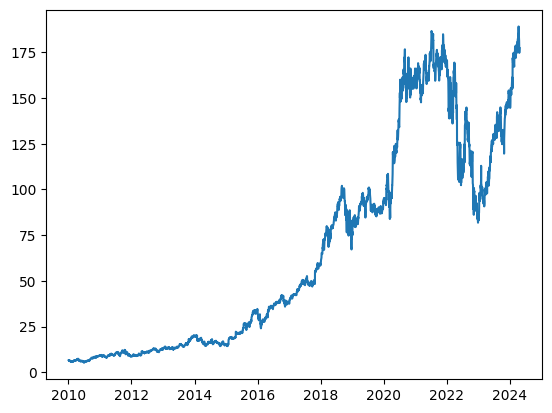

In [ ]:
plt.plot(amzn)

In [ ]:
# now we are going to use minmaxscaler to get the data into an array
amzn = scaler.fit_transform(np.array(amzn).reshape(-1,1))
amzn

array([[0.00688652],
       [0.00710164],
       [0.00643723],
       ...,
       [0.94646537],
       [0.92146805],
       [0.93562771]])

In [ ]:
# We are spiltting the data into training and testing
training_size3 = int(len(amzn)*0.60)
test_size3 = len(amzn) - training_size3
train_data3,test_data3 = amzn[0:training_size3, :],amzn[training_size3:len(amzn), :1]

In [ ]:
training_size3, test_size3

(2159, 1440)

In [ ]:
train_data3

array([[0.00688652],
       [0.00710164],
       [0.00643723],
       ...,
       [0.46527194],
       [0.45491082],
       [0.45442614]])

In [ ]:
#Now we are going to spilt the data into x and y of training and testing, i am going to keep the time_step as 100
time_step3 = 100
x_train3 ,y_train3 = create_dataset(train_data3, time_step3)
x_test3, y_test3 = create_dataset(test_data3, time_step3)

In [ ]:
print(x_train3.shape), print(y_train3.shape)

(2058, 100)
(2058,)


(None, None)

In [ ]:
print(x_test3.shape), print(y_test3.shape)

(1339, 100)
(1339,)


(None, None)

In [ ]:
x_train3 = x_train3.reshape(x_train3.shape[0], x_train3.shape[1], 1)
x_test3 = x_test3.reshape(x_test3.shape[0], x_test3.shape[1], 1)

In [ ]:
# We are creating an model of seqential usinf LSTM and Dense. we are usinf LSTM as our main model.
model3 = Sequential()
model3.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model3.add(LSTM(50,return_sequences=True))
model3.add(LSTM(50))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.fit(x_train3,y_train3,validation_data=(x_test3,y_test3),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
33/33 [==============================] - 7s 50ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 2/100
33/33 [==============================] - 1s 18ms/step - loss: 1.4494e-04 - val_loss: 0.0027
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 6.0296e-05 - val_loss: 0.0016
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 5.6395e-05 - val_loss: 0.0016
Epoch 5/100
33/33 [==============================] - 1s 18ms/step - loss: 5.8436e-05 - val_loss: 0.0018
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: 6.5388e-05 - val_loss: 0.0018
Epoch 7/100
33/33 [==============================] - 1s 17ms/step - loss: 5.6106e-05 - val_loss: 0.0020
Epoch 8/100
33/33 [==============================] - 1s 18ms/step - loss: 7.2393e-05 - val_loss: 0.0019
Epoch 9/100
33/33 [==============================] - 1s 24ms/step - loss: 5.1113e-05 - val_loss: 0.0017
Epoch 10/100
33/33 [==============================] - 1s 24ms/step -

In [ ]:
# We are going to make predicts for the model
train_predict3 = model3.predict(x_train3)
test_predict3 = model3.predict(x_test3)

42/42 [==============================] - 0s 6ms/step


In [ ]:
train_predict3 = scaler.inverse_transform(train_predict3)
test_predict3 = scaler.inverse_transform(test_predict3)

In [ ]:
# Now we will calculate the rmse for the training model
math.sqrt(mean_squared_error(y_train3, train_predict3))

32.114086091770986

In [ ]:
# now we will calculate the RMSE for the testing model
math.sqrt(mean_squared_error(y_test3, test_predict3))

130.21829322889502

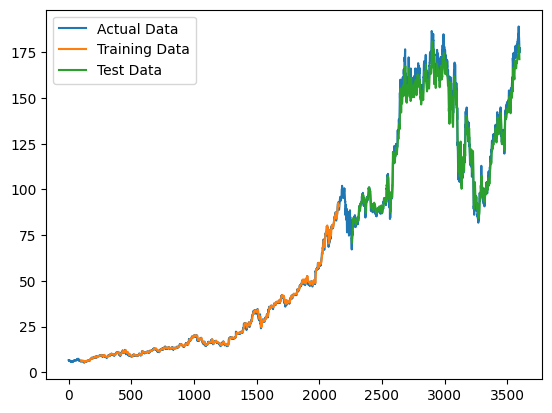

In [ ]:
# We are plottig the actual, training and testing data
look_back3 = 100
trainpredictplot3 = np.empty_like(amzn)
trainpredictplot3[:, :] = np.nan
trainpredictplot3[look_back3:len(train_predict3)+look_back3, :] = train_predict3

testpredictplot3 = np.empty_like(amzn)
testpredictplot3[:, :] = np.nan
testpredictplot3[len(train_predict3)+(look_back3*2)+1:len(amzn)-1, :] = test_predict3

plt.plot(scaler.inverse_transform(amzn), label='Actual Data')
plt.plot(trainpredictplot3, label='Training Data')
plt.plot(testpredictplot3, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data3)

1440

In [ ]:
x_input3 = test_data3[(len(test_data3)-100):].reshape(1,-1)
x_input3.shape

(1, 100)

In [ ]:
temp_input3 = list(x_input3)
temp_input3 = temp_input3[0].tolist()
temp_input3

[0.7711571832998575,
 0.7672905381810327,
 0.7660378880946117,
 0.7711571832998575,
 0.7592303323642414,
 0.7703403098522313,
 0.7574876413092902,
 0.7703403098522313,
 0.7732811373637313,
 0.7649486957977616,
 0.7736078867427817,
 0.7810145107014265,
 0.7732811373637313,
 0.7871685676736959,
 0.8094973837093289,
 0.807972414773684,
 0.7988775302899147,
 0.8082447336229079,
 0.805957404869509,
 0.8059029743396824,
 0.8055217113307598,
 0.8057395996501572,
 0.7978972821527632,
 0.7869506793542985,
 0.7789995007972514,
 0.7577599601585142,
 0.7614088000579872,
 0.7824305354773727,
 0.7947929968516925,
 0.8076456653946334,
 0.815542413421854,
 0.8124926417506554,
 0.8045414631936083,
 0.7966447151663878,
 0.8063930984082581,
 0.8164138004993523,
 0.8133640288281537,
 0.8201171540286974,
 0.824746242065322,
 0.8295387878915172,
 0.8369998423799886,
 0.8486543744663808,
 0.8363463436218876,
 0.8156513575815527,
 0.8378712294574869,
 0.9061101614507158,
 0.8979410945742713,
 0.89162366291247

In [ ]:
### We are going to make a function which will help us to find the next 30 days prediction and put the values into an array.
lst_output3=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input3)>100):
        #print(temp_input)
        x_input3=np.array(temp_input3[1:])
        print("{} day input {}".format(i,x_input3))
        x_input3=x_input3.reshape(1,-1)
        x_input3 = x_input3.reshape((1, n_steps, 1))
        #print(x_input)
        yhat3 = model3.predict(x_input3, verbose=0)
        print("{} day output {}".format(i,yhat3))
        temp_input3.extend(yhat3[0].tolist())
        temp_input3=temp_input3[1:]
        #print(temp_input)
        lst_output3.extend(yhat3.tolist())
        i=i+1
    else:
        x_input3 = x_input3.reshape((1, n_steps,1))
        yhat3 = model3.predict(x_input3, verbose=0)
        print(yhat3[0])
        temp_input3.extend(yhat3[0].tolist())
        print(len(temp_input3))
        lst_output3.extend(yhat3.tolist())
        i=i+1


print(lst_output3)

[0.8792673]
101
1 day input [0.76729054 0.76603789 0.77115718 0.75923033 0.77034031 0.75748764
 0.77034031 0.77328114 0.7649487  0.77360789 0.78101451 0.77328114
 0.78716857 0.80949738 0.80797241 0.79887753 0.80824473 0.8059574
 0.80590297 0.80552171 0.8057396  0.79789728 0.78695068 0.7789995
 0.75775996 0.7614088  0.78243054 0.794793   0.80764567 0.81554241
 0.81249264 0.80454146 0.79664472 0.8063931  0.8164138  0.81336403
 0.82011715 0.82474624 0.82953879 0.83699984 0.84865437 0.83634634
 0.81565136 0.83787123 0.90611016 0.89794109 0.89162366 0.89913923
 0.89538145 0.92048772 0.90899656 0.88884621 0.90158993 0.89516364
 0.89358424 0.88035039 0.88857389 0.92119573 0.92342863 0.9220126
 0.9155318  0.91346235 0.93306807 0.94101933 0.93753386 0.91869051
 0.91536842 0.9333949  0.92538921 0.90692712 0.92560701 0.93197887
 0.94390572 0.92032434 0.92065109 0.92838446 0.94063806 0.94063806
 0.94455922 0.94913396 0.94145502 0.94978746 0.9527828  0.95599595
 0.95447106 0.96383827 0.95071328 0.9

In [ ]:
day_new3=np.arange(1,101)
day_pred3=np.arange(101,131)

In [ ]:
len(amzn)

3599

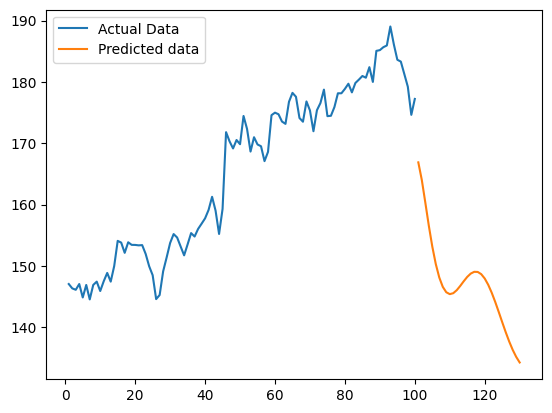

In [ ]:
# We are going to do the plotting for the actual data and predicted data which we got next 30 days.
plt.plot(day_new3,scaler.inverse_transform(amzn[(len(amzn)-100):]), label='Actual Data')
plt.plot(day_pred3,scaler.inverse_transform(lst_output3), label='Predicted data')
plt.legend()

4. Now we are going to make the prediction for a new company that is Microsoft(MSFT)

In [ ]:
# First we are going to download the dataset for Microsoft(msft)
msft = yf.download('MSFT', start='2010-01-01', end=today)
msft

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431589,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439154,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295317,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053053,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212046,51197400
...,...,...,...,...,...,...
2024-04-16,414.570007,418.399994,413.730011,414.579987,414.579987,16765600
2024-04-17,417.250000,418.880005,410.329987,411.839996,411.839996,15855500
2024-04-18,410.630005,411.890015,403.950012,404.269989,404.269989,21029900


In [ ]:
#We are only selecting the close column as we will be predicting the next 30 days so we will need only the close column
msft = msft[['Close']]
msft

,Close
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000
...,...
2024-04-16,414.579987
2024-04-17,411.839996
2024-04-18,404.269989


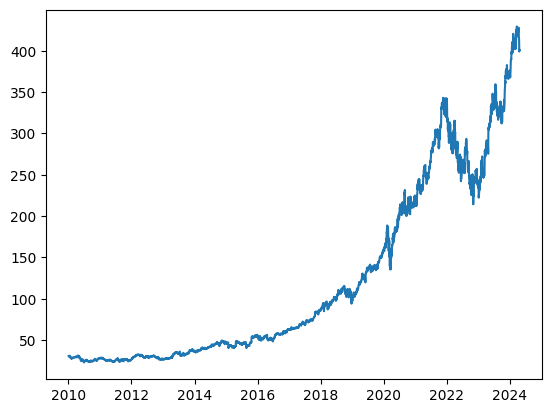

In [ ]:
#we are plotting the actual data first
plt.plot(msft)

In [ ]:
msft = scaler.fit_transform(np.array(msft).reshape(-1,1))
msft

array([[0.01953933],
       [0.01956393],
       [0.01909637],
       ...,
       [0.93823209],
       [0.92555862],
       [0.93008661]])

In [ ]:
# Now we are going to split the data into training and testing
training_size4 = int(len(msft)*0.60)
test_size4 = len(msft) - training_size4
train_data4 , test_data4 = msft[0:training_size4, :], msft[training_size4:len(msft), :1]

In [ ]:
training_size4 , test_size4

(2159, 1440)

In [ ]:
train_data4

array([[0.01953933],
       [0.01956393],
       [0.01909637],
       ...,
       [0.20836205],
       [0.20267744],
       [0.20442465]])

In [ ]:
# we are spiltting the data into x and y in training and testing, i am using time_step as 110
time_step4 = 110
x_train4, y_train4 = create_dataset(train_data4, time_step4)
x_test4, y_test4 = create_dataset(test_data4, time_step4)

In [ ]:
print(x_train4.shape), print(y_train4.shape)

(2048, 110)
(2048,)


(None, None)

In [ ]:
print(x_test4.shape), print(y_test4.shape)

(1329, 110)
(1329,)


(None, None)

In [ ]:
x_train4 = x_train4.reshape(x_train4.shape[0], x_train4.shape[1], 1)
x_test4 = x_test4.reshape(x_test4.shape[0], x_test4.shape[1], 1)

In [ ]:
# I am building an sequential model using LSTM and Dense. our main aim is using LSTM model.
model4 = Sequential()
model4.add(LSTM(50,return_sequences=True,input_shape=(110,1)))
model4.add(LSTM(50,return_sequences=True))
model4.add(LSTM(50))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 110, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 110, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.fit(x_train4,y_train4, validation_data=(x_test4, y_test4), epochs=110,batch_size=64,verbose=1)

Epoch 1/110
32/32 [==============================] - 6s 52ms/step - loss: 7.1807e-04 - val_loss: 0.0067
Epoch 2/110
32/32 [==============================] - 1s 18ms/step - loss: 2.8731e-05 - val_loss: 0.0017
Epoch 3/110
32/32 [==============================] - 1s 18ms/step - loss: 1.9124e-05 - val_loss: 0.0016
Epoch 4/110
32/32 [==============================] - 1s 18ms/step - loss: 1.8887e-05 - val_loss: 0.0013
Epoch 5/110
32/32 [==============================] - 1s 20ms/step - loss: 1.7099e-05 - val_loss: 0.0014
Epoch 6/110
32/32 [==============================] - 1s 24ms/step - loss: 1.7145e-05 - val_loss: 0.0012
Epoch 7/110
32/32 [==============================] - 1s 24ms/step - loss: 1.6634e-05 - val_loss: 0.0011
Epoch 8/110
32/32 [==============================] - 1s 21ms/step - loss: 1.7055e-05 - val_loss: 0.0011
Epoch 9/110
32/32 [==============================] - 1s 18ms/step - loss: 1.7265e-05 - val_loss: 0.0017
Epoch 10/110
32/32 [==============================] - 1s 18ms/st

In [ ]:
train_predict4 = model4.predict(x_train4)
test_predict4 = model4.predict(x_test4)

42/42 [==============================] - 1s 6ms/step


In [ ]:
train_predict4 = scaler.inverse_transform(train_predict4)
test_predict4 = scaler.inverse_transform(test_predict4)

In [ ]:
# Now we will find the RMSE for the train model
math.sqrt(mean_squared_error(y_train4, train_predict4))

50.62348874730457

In [ ]:
# Now we will find the RMSE for the test model
math.sqrt(mean_squared_error(y_test4, test_predict4))

255.82940609486906

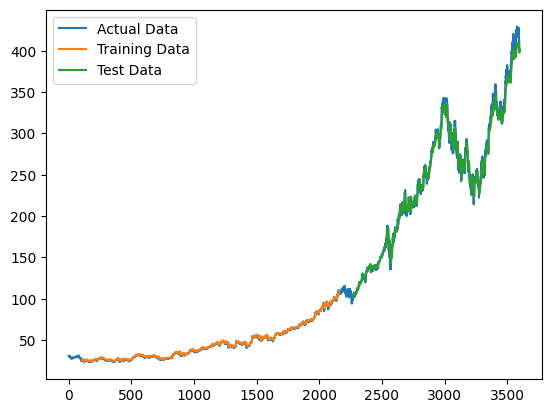

In [ ]:
# Now we are going to plot the actual, training and testing data
look_back4 = 110
trainpredictplot4 = np.empty_like(msft)
trainpredictplot4[:, :] = np.nan
trainpredictplot4[look_back4:len(train_predict4)+look_back4, :] = train_predict4

testpredictplot4 = np.empty_like(msft)
testpredictplot4[:, :] = np.nan
testpredictplot4[len(train_predict4)+(look_back4*2)+1:len(msft)-1, :] = test_predict4

plt.plot(scaler.inverse_transform(msft), label='Actual Data')
plt.plot(trainpredictplot4, label='Training Data')
plt.plot(testpredictplot4, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data4)

1440

In [ ]:
x_input4 = test_data4[(len(test_data4)-110):].reshape(1,-1)
x_input4.shape

(1, 110)

In [ ]:
temp_input4 = list(x_input4)
temp_input4 = temp_input4[0].tolist()
temp_input4

[0.8457279180283541,
 0.8545624400852742,
 0.853085976866737,
 0.869081645932996,
 0.8535289158322982,
 0.8722069265453775,
 0.8614529272045007,
 0.8732158931446168,
 0.8721822937917824,
 0.8750861049213833,
 0.8851511381601818,
 0.8756767653086567,
 0.8758244116305104,
 0.8649965891287068,
 0.8517817176237903,
 0.8600994024543638,
 0.8509449550001412,
 0.8562358902327137,
 0.86430754792677,
 0.8570971354102408,
 0.8646766637314043,
 0.8646520309778092,
 0.8438822639053243,
 0.8556944953526306,
 0.8604193278516663,
 0.8619204989236571,
 0.8554237603626598,
 0.8626095401255939,
 0.8651687931042972,
 0.8653657049333411,
 0.8639137993685406,
 0.8668914336590684,
 0.8687617205356934,
 0.8560389784036697,
 0.855374569955328,
 0.8488286409869991,
 0.8483610692678428,
 0.8654395280942679,
 0.8681465024946835,
 0.885323342135772,
 0.8899006034128125,
 0.8993503435107425,
 0.9037798833660707,
 0.9018112156747823,
 0.9126390381765859,
 0.9244512696238922,
 0.9191357767375832,
 0.9250172221577119

In [ ]:
# I am making a function a predict for the next 30 days and put the values into an array.
lst_output4=[]
n_steps=110
i=0
while(i<30):

    if(len(temp_input4)>110):
        #print(temp_input)
        x_input4=np.array(temp_input4[1:])
        print("{} day input {}".format(i,x_input4))
        x_input4=x_input4.reshape(1,-1)
        x_input4 = x_input4.reshape((1, n_steps, 1))
        #print(x_input)
        yhat4 = model4.predict(x_input4, verbose=0)
        print("{} day output {}".format(i,yhat4))
        temp_input4.extend(yhat4[0].tolist())
        temp_input4=temp_input4[1:]
        #print(temp_input)
        lst_output4.extend(yhat4.tolist())
        i=i+1
    else:
        x_input4 = x_input4.reshape((1, n_steps,1))
        yhat4 = model4.predict(x_input4, verbose=0)
        print(yhat4[0])
        temp_input4.extend(yhat4[0].tolist())
        print(len(temp_input4))
        lst_output4.extend(yhat4.tolist())
        i=i+1


print(lst_output4)

[0.90568626]
111
1 day input [0.85456244 0.85308598 0.86908165 0.85352892 0.87220693 0.86145293
 0.87321589 0.87218229 0.8750861  0.88515114 0.87567677 0.87582441
 0.86499659 0.85178172 0.8600994  0.85094496 0.85623589 0.86430755
 0.85709714 0.86467666 0.86465203 0.84388226 0.8556945  0.86041933
 0.8619205  0.85542376 0.86260954 0.86516879 0.8653657  0.8639138
 0.86689143 0.86876172 0.85603898 0.85537457 0.84882864 0.84836107
 0.86543953 0.8681465  0.88532334 0.8899006  0.89935034 0.90377988
 0.90181122 0.91263904 0.92445127 0.91913578 0.92501722 0.93402402
 0.93970863 0.93739541 0.95164388 0.94886308 0.92176885 0.93702629
 0.95533519 0.94162811 0.94123436 0.96229942 0.96244707 0.97829509
 0.96527713 0.94327693 0.95107785 0.94386751 0.93771533 0.93459005
 0.93308888 0.95639334 0.95316961 0.94627919 0.94613155 0.94672213
 0.96129053 0.96586772 0.96444044 0.93424549 0.93286741 0.9502166
 0.94303082 0.93884731 0.96532632 0.96488338 0.9897874  0.96813175
 0.97034652 0.98041148 0.98981203 1

In [ ]:
# We are going to create new_day and new_pred and we are going to put predicted days
day_new4=np.arange(1,111)
day_pred4=np.arange(111,141)

In [ ]:
len(msft)

3599

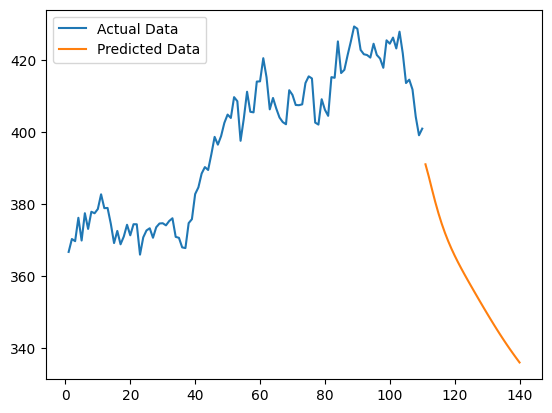

In [ ]:
# Now we are going to plot the actual data and the predicted data(for the next 30 days)
plt.plot(day_new4,scaler.inverse_transform(msft[(len(msft)-110):]), label='Actual Data')
plt.plot(day_pred4,scaler.inverse_transform(lst_output4), label='Predicted Data')
plt.legend()

5. Now we  are going to make predictions for a new a company that is JP Morgan(JPM)

In [ ]:
# We will download the data from yahoo finance for JPMorgan(jpm)
jpm = yf.download('JPM', start='2010-01-01', end=today)
jpm

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,41.790001,42.990002,41.669998,42.849998,29.497786,35460500
2010-01-05,42.790001,43.840000,42.779999,43.680000,30.069139,41208300
2010-01-06,43.450001,44.090000,43.310001,43.919998,30.234373,27729000
2010-01-07,43.790001,45.119999,43.610001,44.790001,30.833269,44864700
2010-01-08,44.369999,44.700001,44.080002,44.680000,30.757549,33110100
...,...,...,...,...,...,...
2024-04-16,182.899994,183.160004,179.649994,180.800003,180.800003,16451800
2024-04-17,181.369995,182.419998,179.199997,180.080002,180.080002,9017100
2024-04-18,181.100006,183.360001,179.970001,181.250000,181.250000,9557700


In [ ]:
# We only need the close column to make prediction so we are taking only close column.
jpm = jpm[['Close']]
jpm

,Close
Date,
2010-01-04,42.849998
2010-01-05,43.680000
2010-01-06,43.919998
2010-01-07,44.790001
2010-01-08,44.680000
...,...
2024-04-16,180.800003
2024-04-17,180.080002
2024-04-18,181.250000


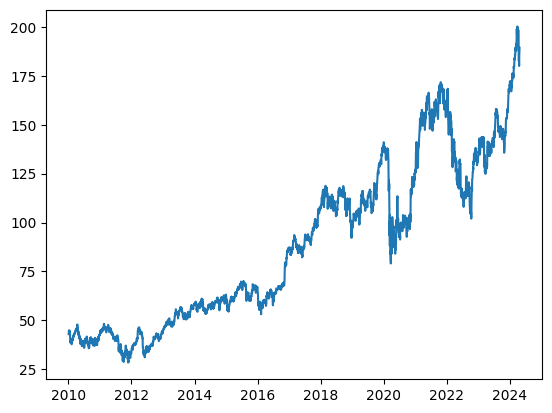

In [ ]:
plt.plot(jpm)

In [ ]:
# we are converting the close column into an array.
jpm = scaler.fit_transform(np.array(jpm).reshape(-1,1))
jpm

array([[0.08416705],
       [0.08899489],
       [0.09039087],
       ...,
       [0.88919263],
       [0.91565845],
       [0.93665659]])

In [ ]:
## Now we spiltting the data into the training and testing data
training_size5 = int(len(jpm)*0.65)
test_size5 = len(jpm)-training_size5
train_data5, test_data5 = jpm[0:training_size5, :], jpm[training_size5:len(jpm), :1]

In [ ]:
training_size5, test_size5

(2339, 1260)

In [ ]:
train_data5

array([[0.08416705],
       [0.08899489],
       [0.09039087],
       ...,
       [0.48115401],
       [0.49976734],
       [0.49488133]])

In [ ]:
# We are going to spilt the data into x_train, y_train, x_test and y_test.
time_step5 = 120
x_train5, y_train5 = create_dataset(train_data5, time_step5)
x_test5, y_test5 = create_dataset(test_data5, time_step5)

In [ ]:
print(x_train5.shape), print(y_train5.shape)

(2218, 120)
(2218,)


(None, None)

In [ ]:
print(x_test5.shape), print(y_test5.shape)

(1139, 120)
(1139,)


(None, None)

In [ ]:
x_train5 = x_train5.reshape(x_train5.shape[0], x_train5.shape[1], 1)
x_test5 = x_test5.reshape(x_test5.shape[0], x_test5.shape[1], 1)

In [ ]:
# We are making a model using sequential, LSTM and Dense. but our main aim is LSTM.
model5 = Sequential()
model5.add(LSTM(50,return_sequences=True,input_shape=(120,1)))
model5.add(LSTM(50,return_sequences=True))
model5.add(LSTM(50))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam')
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 120, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 120, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.fit(x_train5, y_train5, validation_data=(x_test5,y_test5),epochs=120, batch_size=64, verbose=1)

Epoch 1/120
35/35 [==============================] - 6s 57ms/step - loss: 0.0095 - val_loss: 0.0052
Epoch 2/120
35/35 [==============================] - 1s 26ms/step - loss: 3.9784e-04 - val_loss: 0.0017
Epoch 3/120
35/35 [==============================] - 1s 23ms/step - loss: 2.3218e-04 - val_loss: 0.0019
Epoch 4/120
35/35 [==============================] - 1s 18ms/step - loss: 2.2410e-04 - val_loss: 0.0018
Epoch 5/120
35/35 [==============================] - 1s 18ms/step - loss: 2.1864e-04 - val_loss: 0.0025
Epoch 6/120
35/35 [==============================] - 1s 18ms/step - loss: 2.1916e-04 - val_loss: 0.0019
Epoch 7/120
35/35 [==============================] - 1s 19ms/step - loss: 2.1038e-04 - val_loss: 0.0019
Epoch 8/120
35/35 [==============================] - 1s 18ms/step - loss: 2.2290e-04 - val_loss: 0.0018
Epoch 9/120
35/35 [==============================] - 1s 19ms/step - loss: 2.0569e-04 - val_loss: 0.0025
Epoch 10/120
35/35 [==============================] - 1s 18ms/step -

In [ ]:
## We are predicting for our training and testing model.
train_predict5 = model5.predict(x_train5)
test_predict5 = model5.predict(x_test5)

36/36 [==============================] - 0s 8ms/step


In [ ]:
train_predict5 = scaler.inverse_transform(train_predict5)
test_predict5 = scaler.inverse_transform(test_predict5)

In [ ]:
# We are going to calculate the RMSE for the training model
math.sqrt(mean_squared_error(y_train5, train_predict5))

68.85180203758321

In [ ]:
# We are calculating the RMSE for the test model
math.sqrt(mean_squared_error(y_test5, test_predict5))

136.13572229843527

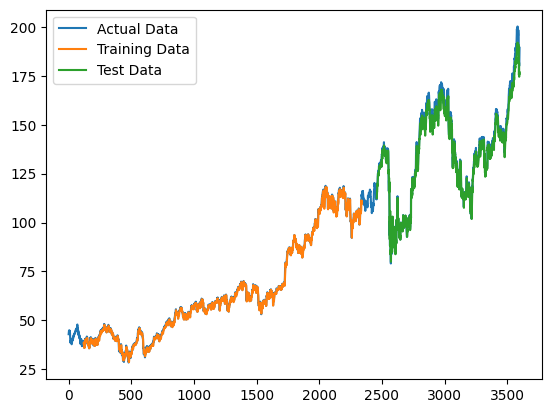

In [ ]:
## We are going to plot the actual, training and test data
look_back5 = 120
trainpredictplot5 = np.empty_like(jpm)
trainpredictplot5[:, :] = np.nan
trainpredictplot5[look_back5:len(train_predict5)+look_back5, :] = train_predict5

testpredictplot5 = np.empty_like(jpm)
testpredictplot5[:, :] = np.nan
testpredictplot5[len(train_predict5)+(look_back5*2)+1:len(jpm)-1, :] = test_predict5

plt.plot(scaler.inverse_transform(jpm), label='Actual Data')
plt.plot(trainpredictplot5, label='Training Data')
plt.plot(testpredictplot5, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data5)

1260

In [ ]:
x_input5=test_data5[(len(test_data5)-look_back5):].reshape(1,-1)
x_input5.shape

(1, 120)

In [ ]:
temp_input5=list(x_input5)
temp_input5=temp_input5[0].tolist()
temp_input5

[0.6342484675449249,
 0.643787784393058,
 0.6430898137411751,
 0.657515102662827,
 0.6667054341850187,
 0.6729874363174726,
 0.672580227600428,
 0.6767100943861301,
 0.6742088849582676,
 0.6866565311961385,
 0.682875738491547,
 0.6983480721461925,
 0.7059097463105446,
 0.715856183120553,
 0.7238250660019496,
 0.7265588139735473,
 0.7246975293168032,
 0.7267915300276211,
 0.7280129786684162,
 0.7259772013487014,
 0.7280129786684162,
 0.7325500541711628,
 0.7427873416711788,
 0.7472079703917193,
 0.7538971812412177,
 0.7537808232141808,
 0.7441251483390108,
 0.7469171197017116,
 0.7569800032939262,
 0.7603536760366423,
 0.7686133208528773,
 0.7717542775415195,
 0.7887971339180708,
 0.7960097340013121,
 0.8018263927807876,
 0.8147393823716368,
 0.8036877661927011,
 0.809213574282169,
 0.8086318729021537,
 0.8143903970456954,
 0.8202651904611047,
 0.8255002366157342,
 0.8243369226108731,
 0.8358538821427872,
 0.8314913880581806,
 0.8319567314111589,
 0.8369590615117146,
 0.8355048968168457

In [ ]:
## I am passing a function which will help us to calculate the predictions for the next 30 days and give them into an array.
lst_output5=[]
n_steps=120
i=0
while(i<30):

    if(len(temp_input5)>120):
        #print(temp_input5)
        x_input5=np.array(temp_input5[1:])
        print("{} day input {}".format(i,x_input5))
        x_input5=x_input5.reshape(1,-1)
        x_input5 = x_input5.reshape((1, n_steps, 1))
        #print(x_input5)
        yhat5 = model5.predict(x_input5, verbose=0)
        print("{} day output {}".format(i,yhat5))
        temp_input5.extend(yhat5[0].tolist())
        temp_input5=temp_input5[1:]
        #print(temp_input5)
        lst_output5.extend(yhat5.tolist())
        i=i+1
    else:
        x_input5 = x_input5.reshape((1, n_steps,1))
        yhat5 = model5.predict(x_input5, verbose=0)
        print(yhat5[0])
        temp_input5.extend(yhat5[0].tolist())
        print(len(temp_input5))
        lst_output5.extend(yhat5.tolist())
        i=i+1


print(lst_output5)

[0.8929326]
121
1 day input [0.64378778 0.64308981 0.6575151  0.66670543 0.67298744 0.67258023
 0.67671009 0.67420888 0.68665653 0.68287574 0.69834807 0.70590975
 0.71585618 0.72382507 0.72655881 0.72469753 0.72679153 0.72801298
 0.7259772  0.72801298 0.73255005 0.74278734 0.74720797 0.75389718
 0.75378082 0.74412515 0.74691712 0.75698    0.76035368 0.76861332
 0.77175428 0.78879713 0.79600973 0.80182639 0.81473938 0.80368777
 0.80921357 0.80863187 0.8143904  0.82026519 0.82550024 0.82433692
 0.83585388 0.83149139 0.83195673 0.83695906 0.8355049  0.82759424
 0.82968824 0.82550024 0.81822941 0.81206377 0.80682872 0.80874823
 0.82555837 0.82439506 0.81788043 0.82666355 0.84085621 0.8370172
 0.83963467 0.8602257  0.84911586 0.84545133 0.85126799 0.84993019
 0.85342022 0.85533964 0.8516752  0.85289665 0.85743364 0.84853416
 0.85882967 0.88116561 0.87627964 0.88035129 0.88715677 0.89977899
 0.90513031 0.90146579 0.90198926 0.9073988  0.91717075 0.91269189
 0.92077705 0.93165426 0.93735456 0

In [ ]:
day_new5=np.arange(1,121)
day_pred5=np.arange(121,151)

In [ ]:
len(jpm)

3599

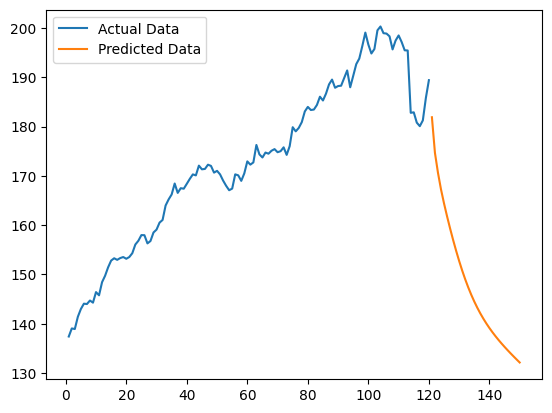

In [ ]:
# We are going to plot the Actual data and the predicted data for the next 30 days.
plt.plot(day_new5,scaler.inverse_transform(jpm[(len(jpm)-look_back5):]), label='Actual Data')
plt.plot(day_pred5,scaler.inverse_transform(lst_output5), label='Predicted Data')
plt.legend()

Now we are going to do the predictons for a new company that is Visa(V)

In [ ]:
# We are to download the dataset from yahoo finance for Visa(v)
v = yf.download('V', start='2010-01-01', end=today)
v

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,22.000000,22.192499,21.865000,22.035000,19.899319,20180000
2010-01-05,21.825001,21.882500,21.500000,21.782499,19.671293,25833600
2010-01-06,21.752501,21.770000,21.475000,21.490000,19.407143,16254000
2010-01-07,21.492500,21.750000,21.387501,21.690001,19.587751,27841200
2010-01-08,21.705000,21.847500,21.557501,21.750000,19.641943,11907200
...,...,...,...,...,...,...
2024-04-16,270.540009,274.130005,270.170013,271.350006,271.350006,8237100
2024-04-17,273.299988,274.000000,271.500000,272.690002,272.690002,5940900
2024-04-18,272.570007,273.149994,269.859985,271.369995,271.369995,8231800


In [ ]:
# As we only need the close column we are removing the other ones and only considering teh close column
v = v[['Close']]
v

,Close
Date,
2010-01-04,22.035000
2010-01-05,21.782499
2010-01-06,21.490000
2010-01-07,21.690001
2010-01-08,21.750000
...,...
2024-04-16,271.350006
2024-04-17,272.690002
2024-04-18,271.369995


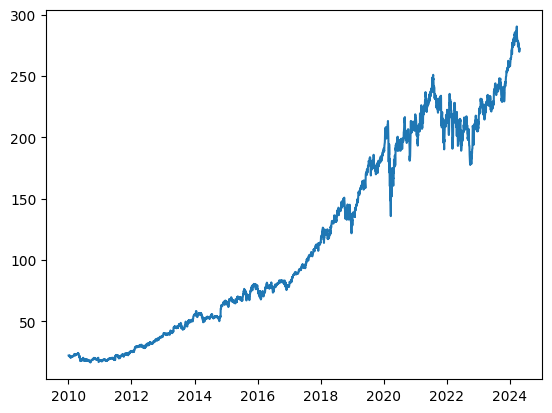

In [ ]:
plt.plot(v)

In [ ]:
# we are using minmaxscaler and converting the close data into an array.
v = scaler.fit_transform(np.array(v).reshape(-1,1))
v

array([[0.02067518],
       [0.01975364],
       [0.01868613],
       ...,
       [0.93065693],
       [0.92485403],
       [0.93416055]])

In [ ]:
# Now we are going to split the data into training and testing data
training_size6 = int(len(v)*0.65)
test_size6 = len(v) - training_size6
train_data6, test_data6 = v[0:training_size6, :], v[training_size6:len(v), :1]

In [ ]:
training_size6, test_size6

(2339, 1260)

In [ ]:
train_data6

array([[0.02067518],
       [0.01975364],
       [0.01868613],
       ...,
       [0.52503649],
       [0.52580294],
       [0.52478104]])

In [ ]:
## Now we are spiltting the data into x_train, x_test, y_train and y_test.
time_step6 = 130
x_train6, y_train6 = create_dataset(train_data6, time_step6)
x_test6, y_test6 = create_dataset(test_data6, time_step6)

In [ ]:
print(x_train6.shape), print(y_train6.shape)

(2208, 130)
(2208,)


(None, None)

In [ ]:
print(x_test6.shape), print(y_test6.shape)

(1129, 130)
(1129,)


(None, None)

In [ ]:
x_train6 = x_train6.reshape(x_train6.shape[0], x_train6.shape[1], 1)
x_test6 = x_test6.reshape(x_test6.shape[0], x_test6.shape[1], 1)

In [ ]:
### I am making a model that includes sequential, LSTM and Dense. but mainly we are working on LSTM
model6 = Sequential()
model6.add(LSTM(50,return_sequences=True,input_shape=(130,1)))
model6.add(LSTM(50,return_sequences=True))
model6.add(LSTM(50))
model6.add(Dense(1))
model6.compile(loss='mean_squared_error', optimizer='adam')
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 130, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 130, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model6.fit(x_train6, y_train6, validation_data=(x_test6,y_test6), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
35/35 [==============================] - 6s 56ms/step - loss: 0.0049 - val_loss: 0.0028
Epoch 2/100
35/35 [==============================] - 1s 26ms/step - loss: 1.6834e-04 - val_loss: 0.0024
Epoch 3/100
35/35 [==============================] - 1s 25ms/step - loss: 7.8500e-05 - val_loss: 0.0018
Epoch 4/100
35/35 [==============================] - 1s 19ms/step - loss: 7.5787e-05 - val_loss: 0.0018
Epoch 5/100
35/35 [==============================] - 1s 19ms/step - loss: 7.5581e-05 - val_loss: 0.0020
Epoch 6/100
35/35 [==============================] - 1s 19ms/step - loss: 7.6393e-05 - val_loss: 0.0022
Epoch 7/100
35/35 [==============================] - 1s 19ms/step - loss: 8.4796e-05 - val_loss: 0.0013
Epoch 8/100
35/35 [==============================] - 1s 19ms/step - loss: 1.0221e-04 - val_loss: 0.0019
Epoch 9/100
35/35 [==============================] - 1s 20ms/step - loss: 8.1698e-05 - val_loss: 0.0023
Epoch 10/100
35/35 [==============================] - 1s 20ms/step -

In [ ]:
# we are predicting the train and test model
train_predict6 = model6.predict(x_train6)
test_predict6 = model6.predict(x_test6)

36/36 [==============================] - 1s 7ms/step


In [ ]:
train_predict6 = scaler.inverse_transform(train_predict6)
test_predict6 = scaler.inverse_transform(test_predict6)

In [ ]:
## we are claculating the RMSE for the train model
math.sqrt(mean_squared_error(y_train6, train_predict6))

76.39368396732935

In [ ]:
## we are calculating the RSME for test model
math.sqrt(mean_squared_error(y_test6, test_predict6))

217.7747782779125

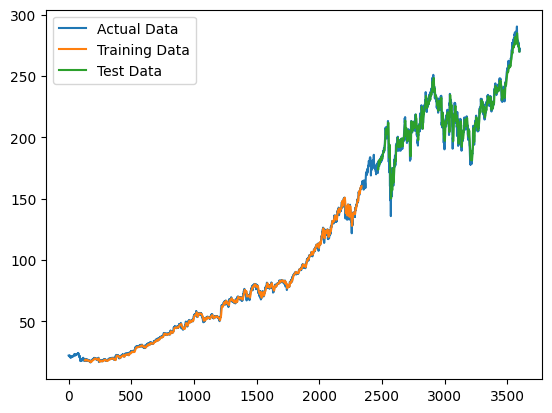

In [ ]:
# Now we are going to plot the actual, training and test data
look_back6 = 130
trainpredictplot6 = np.empty_like(v)
trainpredictplot6[:, :] = np.nan
trainpredictplot6[look_back6:len(train_predict6)+look_back6, :] = train_predict6

testpredictplot6 = np.empty_like(v)
testpredictplot6[:, :] = np.nan
testpredictplot6[len(train_predict6)+(look_back6*2)+1:len(v)-1, :] = test_predict6

plt.plot(scaler.inverse_transform(v), label='Actual Data')
plt.plot(trainpredictplot6, label='Training Data')
plt.plot(testpredictplot6, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data6)

1260

In [ ]:
x_input6=test_data6[(len(test_data6)-look_back6):].reshape(1,-1)
x_input6.shape

(1, 130)

In [ ]:
temp_input6=list(x_input6)
temp_input6=temp_input6[0].tolist()
temp_input6

[0.8164233983817427,
 0.8205474481905801,
 0.8069343248130838,
 0.793576646935191,
 0.7920073305674504,
 0.7852554833333263,
 0.7966423270645071,
 0.8046715688636857,
 0.784343074555148,
 0.7770073280266392,
 0.790912428895834,
 0.7982847074164379,
 0.8109854220157559,
 0.8280292113094444,
 0.8293066058744989,
 0.8289051437845399,
 0.8335766722736917,
 0.830437983849198,
 0.8221532965504158,
 0.8353284815348705,
 0.8332116864868154,
 0.8414963737855976,
 0.8457664401847903,
 0.8474452968398039,
 0.8510583999604219,
 0.8525547637219971,
 0.8608029190286842,
 0.8662408953946712,
 0.8683576904427261,
 0.8677737354593291,
 0.863394184461876,
 0.8681021892541103,
 0.8770437841424549,
 0.8762044393484667,
 0.8688686371309455,
 0.8694890684174252,
 0.8683211584506312,
 0.8739051514069736,
 0.8736131739152749,
 0.8764598291590578,
 0.8875547510875524,
 0.8978467488361292,
 0.8845256029503314,
 0.8819708138202225,
 0.883211676393182,
 0.8891240674552932,
 0.8786131005101956,
 0.8874817984813871

In [ ]:
### I am passing a function that will help us to find the predicting values for the next 30 days, and then i am giving those values in an array.
lst_output6=[]
n_steps=130
i=0
while(i<30):

    if(len(temp_input6)>130):
        #print(temp_input6)
        x_input6=np.array(temp_input6[1:])
        print("{} day input {}".format(i,x_input6))
        x_input6=x_input6.reshape(1,-1)
        x_input6 = x_input6.reshape((1, n_steps, 1))
        #print(x_input6)
        yhat6 = model6.predict(x_input6, verbose=0)
        print("{} day output {}".format(i,yhat6))
        temp_input6.extend(yhat6[0].tolist())
        temp_input6=temp_input6[1:]
        #print(temp_input6)
        lst_output6.extend(yhat6.tolist())
        i=i+1
    else:
        x_input6 = x_input6.reshape((1, n_steps,1))
        yhat6 = model6.predict(x_input6, verbose=0)
        print(yhat6[0])
        temp_input6.extend(yhat6[0].tolist())
        print(len(temp_input6))
        lst_output6.extend(yhat6.tolist())
        i=i+1


print(lst_output6)

[0.92310494]
131
1 day input [0.82054745 0.80693432 0.79357665 0.79200733 0.78525548 0.79664233
 0.80467157 0.78434307 0.77700733 0.79091243 0.79828471 0.81098542
 0.82802921 0.82930661 0.82890514 0.83357667 0.83043798 0.8221533
 0.83532848 0.83321169 0.84149637 0.84576644 0.8474453  0.8510584
 0.85255476 0.86080292 0.8662409  0.86835769 0.86777374 0.86339418
 0.86810219 0.87704378 0.87620444 0.86886864 0.86948907 0.86832116
 0.87390515 0.87361317 0.87645983 0.88755475 0.89784675 0.8845256
 0.88197081 0.88321168 0.88912407 0.8786131  0.8874818  0.88343065
 0.88609492 0.88525546 0.89062043 0.89043799 0.88503649 0.88178838
 0.88773719 0.88802922 0.8984307  0.90131384 0.90580293 0.90386862
 0.90437963 0.90828465 0.9133577  0.91886868 0.9289416  0.93003656
 0.93025553 0.93167883 0.93518244 0.91813871 0.93901463 0.95175182
 0.9375548  0.95138683 0.9518613  0.94602187 0.95032852 0.95992708
 0.94675184 0.94912408 0.94416063 0.94686132 0.95324818 0.96572998
 0.95689782 0.94445255 0.95032852 0.

In [ ]:
day_new6=np.arange(1,131)
day_pred6=np.arange(131,161)

In [ ]:
len(v)

3599

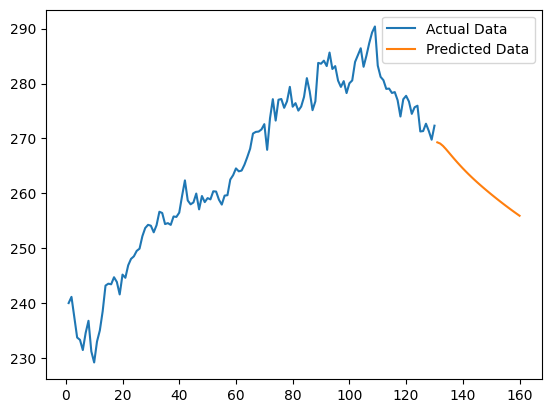

In [ ]:
## Now we are going to plot the Actual and the predicted 30 days value.
plt.plot(day_new6,scaler.inverse_transform(v[(len(v)-look_back6):]), label='Actual Data')
plt.plot(day_pred6,scaler.inverse_transform(lst_output6), label='Predicted Data')
plt.legend()

7. Now we are going to make prediction for a new company that is Walmart(WMT)

In [ ]:
# We are going to download the dataset from yahoo finance for Walmart(wmt).
wmt = yf.download('WMT', start='2010-01-01', end=today)
wmt

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17.913334,18.223333,17.889999,18.076668,13.196321,62259300
2010-01-05,18.030001,18.063334,17.856667,17.896667,13.064914,46945200
2010-01-06,17.833332,17.943333,17.806667,17.856667,13.035711,37551600
2010-01-07,17.906668,17.916668,17.753332,17.866667,13.043009,31988100
2010-01-08,17.809999,17.843332,17.673332,17.776667,12.977307,34089600
...,...,...,...,...,...,...
2024-04-16,60.029999,60.290001,59.779999,59.840000,59.840000,14726300
2024-04-17,60.150002,60.430000,59.570000,59.650002,59.650002,15329700
2024-04-18,59.830002,59.939999,59.220001,59.259998,59.259998,12061500


In [ ]:
# As we only need the close column as we are taking everything out of the dataset.
wmt = wmt[['Close']]
wmt

,Close
Date,
2010-01-04,18.076668
2010-01-05,17.896667
2010-01-06,17.856667
2010-01-07,17.866667
2010-01-08,17.776667
...,...
2024-04-16,59.840000
2024-04-17,59.650002
2024-04-18,59.259998


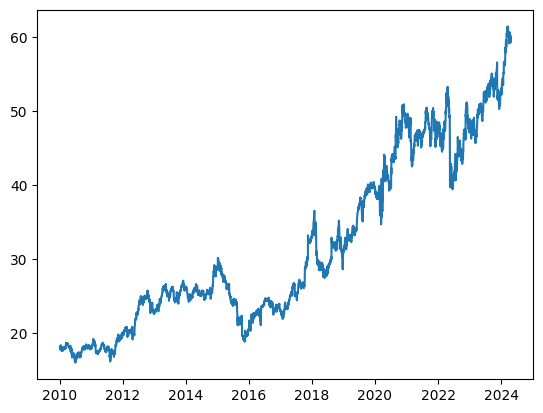

In [ ]:
plt.plot(wmt)

In [ ]:
# we are using minmaxscaler to convert the close column into an array.
wmt = scaler.fit_transform(np.array(wmt).reshape(-1,1))
wmt

array([[0.04569126],
       [0.04173086],
       [0.04085075],
       ...,
       [0.95181513],
       [0.95775573],
       [0.97117709]])

In [ ]:
# Now we are going to spilt the data into training and testing data
training_size7 = int(len(wmt)*0.55)
test_size7 = len(wmt) - training_size7
train_data7, test_data7 = wmt[0:training_size7, :], wmt[training_size7:len(wmt), :1]

In [ ]:
training_size7, test_size7

(1979, 1620)

In [ ]:
train_data7

array([[0.04569126],
       [0.04173086],
       [0.04085075],
       ...,
       [0.30033002],
       [0.30993764],
       [0.31023103]])

In [ ]:
## Now we are going to spilt the data into x_train, x_test , y_train and y_test.
time_step7 =100
x_train7, y_train7 = create_dataset(train_data7, time_step7)
x_test7, y_test7 = create_dataset(test_data7, time_step7)

In [ ]:
print(x_train7.shape), print(y_train7.shape)

(1878, 100)
(1878,)


(None, None)

In [ ]:
print(x_test7.shape), print(y_test7.shape)

(1519, 100)
(1519,)


(None, None)

In [ ]:
x_train7 = x_train7.reshape(x_train7.shape[0], x_train7.shape[1], 1)
x_test7 = x_test7.reshape(x_test7.shape[0], x_test7.shape[1], 1)

In [ ]:
model7 = Sequential()
model7.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model7.add(LSTM(50, return_sequences=True))
model7.add(LSTM(50))
model7.add(Dense(1))
model7.compile(loss='mean_squared_error', optimizer='adam')
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_19 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model7.fit(x_train7, y_train7, validation_data=(x_test7,y_test7), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
30/30 [==============================] - 6s 54ms/step - loss: 0.0030 - val_loss: 0.0172
Epoch 2/100
30/30 [==============================] - 1s 19ms/step - loss: 2.5472e-04 - val_loss: 0.0027
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 2.0381e-04 - val_loss: 0.0022
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 1.9285e-04 - val_loss: 0.0020
Epoch 5/100
30/30 [==============================] - 1s 20ms/step - loss: 1.8575e-04 - val_loss: 0.0019
Epoch 6/100
30/30 [==============================] - 1s 24ms/step - loss: 1.7716e-04 - val_loss: 0.0017
Epoch 7/100
30/30 [==============================] - 1s 25ms/step - loss: 1.7328e-04 - val_loss: 0.0012
Epoch 8/100
30/30 [==============================] - 1s 26ms/step - loss: 1.6525e-04 - val_loss: 9.7703e-04
Epoch 9/100
30/30 [==============================] - 1s 18ms/step - loss: 1.5697e-04 - val_loss: 0.0022
Epoch 10/100
30/30 [==============================] - 1s 18ms/st

In [ ]:
# we are predicting the train and test model
train_predict7 = model7.predict(x_train7)
test_predict7 = model7.predict(x_test7)

48/48 [==============================] - 0s 6ms/step


In [ ]:
train_predict7 = scaler.inverse_transform(train_predict7)
test_predict7 = scaler.inverse_transform(test_predict7)

In [ ]:
# we are calculating the RMSE for the train model.
math.sqrt(mean_squared_error(y_train7, train_predict7))

22.89473901127747

In [ ]:
# we are calculating the RMSE for the test model.
math.sqrt(mean_squared_error(y_test7, test_predict7))

42.54193830808729

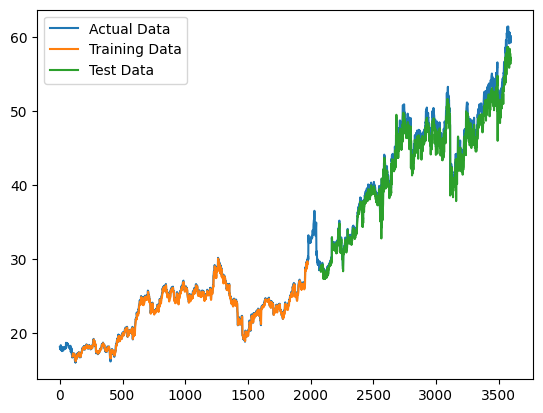

In [ ]:
# Now we are going to plot the actual, training and testing data
look_back7 = 100
trainpredictplot7 = np.empty_like(wmt)
trainpredictplot7[:, :] = np.nan
trainpredictplot7[look_back7:len(train_predict7)+look_back7, :] = train_predict7

testpredictplot7 = np.empty_like(wmt)
testpredictplot7[:, :] = np.nan
testpredictplot7[len(train_predict7)+(look_back7*2)+1:len(wmt)-1, :] = test_predict7

plt.plot(scaler.inverse_transform(wmt), label='Actual Data')
plt.plot(trainpredictplot7, label='Training Data')
plt.plot(testpredictplot7, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data7)

1620

In [ ]:
x_input7 = test_data7[(len(test_data7)-look_back7):].reshape(1,-1)
x_input7.shape

(1, 100)

In [ ]:
temp_input7 = list(x_input7)
temp_input7 = temp_input7[0].tolist()
temp_input7

[0.8114411539941642,
 0.7926659613603486,
 0.7898056518788747,
 0.77990464515972,
 0.7796113037577495,
 0.7900989932808451,
 0.7777044587473441,
 0.7661165920863287,
 0.754382096690194,
 0.7571690498382424,
 0.7580491579758855,
 0.7777777311490379,
 0.7639896780756468,
 0.7681701497635853,
 0.7845250869847482,
 0.7886322023392611,
 0.7752842033346916,
 0.7832782811117094,
 0.7968463491165556,
 0.7950861328412695,
 0.8058672476980673,
 0.8035937049522659,
 0.8041803877562068,
 0.8162083084860436,
 0.8162815808877375,
 0.8049871395604242,
 0.797286403185377,
 0.8085808445126903,
 0.8163549372211629,
 0.8308763857653461,
 0.8295563074906132,
 0.8310964547656228,
 0.8348367884530081,
 0.8292628821569112,
 0.8451778492409843,
 0.8388705474740954,
 0.838943903807521,
 0.8419508420241144,
 0.8250824944007042,
 0.8422441834260848,
 0.8527319568809122,
 0.8583791355787029,
 0.8624128945997904,
 0.8599192828537123,
 0.8823615367732194,
 0.8916025043550078,
 0.8849285048527229,
 0.893362636698562

In [ ]:
# i am passing a function which will us to get tpredicted values for the nest 30 days and give them in an array.
lst_output7=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input7)>100):
        #print(temp_input7)
        x_input7=np.array(temp_input7[1:])
        print("{} day input {}".format(i,x_input7))
        x_input7=x_input7.reshape(1,-1)
        x_input7 = x_input7.reshape((1, n_steps, 1))
        #print(x_input7)
        yhat7 = model7.predict(x_input7, verbose=0)
        print("{} day output {}".format(i,yhat7))
        temp_input7.extend(yhat7[0].tolist())
        temp_input7=temp_input7[1:]
        #print(temp_input7)
        lst_output7.extend(yhat7.tolist())
        i=i+1
    else:
        x_input7 = x_input7.reshape((1, n_steps,1))
        yhat7 = model7.predict(x_input7, verbose=0)
        print(yhat7[0])
        temp_input7.extend(yhat7[0].tolist())
        print(len(temp_input7))
        lst_output7.extend(yhat7.tolist())
        i=i+1


print(lst_output7)

[0.9185185]
101
1 day input [0.79266596 0.78980565 0.77990465 0.7796113  0.79009899 0.77770446
 0.76611659 0.7543821  0.75716905 0.75804916 0.77777773 0.76398968
 0.76817015 0.78452509 0.7886322  0.7752842  0.78327828 0.79684635
 0.79508613 0.80586725 0.8035937  0.80418039 0.81620831 0.81628158
 0.80498714 0.7972864  0.80858084 0.81635494 0.83087639 0.82955631
 0.83109645 0.83483679 0.82926288 0.84517785 0.83887055 0.8389439
 0.84195084 0.82508249 0.84224418 0.85273196 0.85837914 0.86241289
 0.85991928 0.88236154 0.8916025  0.8849285  0.89336264 0.89020899
 0.89013571 0.88947559 0.89695634 0.88844885 0.88448845 0.88954895
 0.8973964  0.93773373 0.92189221 0.93443345 0.93553355 0.95929588
 0.95907589 0.95973593 0.93751375 0.94081403 0.95269524 0.9689769
 0.98063804 0.9760176  0.97073703 0.98261824 0.99911989 0.99625958
 0.99053905 0.9830583  0.9870187  0.98723868 0.99559954 1.
 0.98723868 0.98063804 0.97931788 0.9839384  0.97183713 0.96809679
 0.94961494 0.95555555 0.95709569 0.96479643

In [ ]:
day_new7=np.arange(1,101)
day_pred7=np.arange(101,131)

In [ ]:
len(wmt)

3599

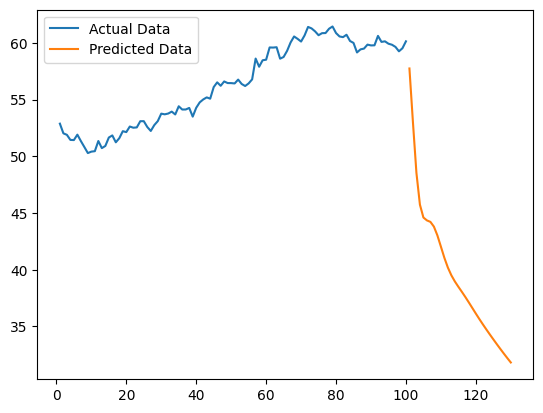

In [ ]:
## We are going to plot the Actual data and predicted values for the next 30 days.
plt.plot(day_new7,scaler.inverse_transform(wmt[(len(wmt)-look_back7):]), label='Actual Data')
plt.plot(day_pred7,scaler.inverse_transform(lst_output7), label='Predicted Data')
plt.legend()

8. Now we are going to make predictions for a new company that is Saudi Aramco(2222.SR)

In [ ]:
## We are going to download the dataset from yahoo finance for Saudi Aramco(ssss.sr)
sa = yf.download('2222.SR', start='2010-01-01', end=today)
sa

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,29.090908,29.090908,29.090908,29.090908,25.485231,38289394
2019-12-12,31.983471,31.983471,29.752066,30.413223,26.643652,505692621
2019-12-15,30.661158,30.991735,30.413223,30.909090,27.078062,98349281
2019-12-16,30.991735,31.487602,30.991735,31.404959,27.512468,105973907
2019-12-17,31.446280,31.528925,30.991735,31.198347,27.331461,142672245
...,...,...,...,...,...,...
2024-04-16,30.400000,30.450001,29.799999,29.900000,29.900000,24539116
2024-04-17,30.049999,30.150000,29.900000,29.950001,29.950001,16440263
2024-04-18,30.000000,30.049999,29.850000,29.900000,29.900000,7985988


In [ ]:

# As we only need the close column we are removing the rest of the things and only taking close column.
sa = sa[['Close']]
sa

,Close
Date,
2019-12-11,29.090908
2019-12-12,30.413223
2019-12-15,30.909090
2019-12-16,31.404959
2019-12-17,31.198347
...,...
2024-04-16,29.900000
2024-04-17,29.950001
2024-04-18,29.900000


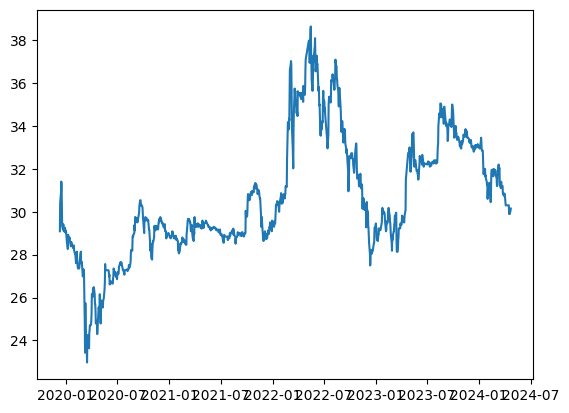

In [ ]:
plt.plot(sa)

In [ ]:
# We are converting the close column into an array.
sa = scaler.fit_transform(np.array(sa).reshape(-1,1))
sa

array([[0.39050125],
       [0.47493404],
       [0.50659625],
       ...,
       [0.44216356],
       [0.45174137],
       [0.45812662]])

In [ ]:
#Now we are going to spilt the data into training and testing data.
training_size8 = int(len(sa)*0.60)
test_size8 = len(sa)-training_size8
train_data8, test_data8 = sa[0:training_size8, :], sa[training_size8:len(sa), :1]

In [ ]:
training_size8, test_size8

(652, 435)

In [ ]:
train_data8

array([[0.39050125],
       [0.47493404],
       [0.50659625],
       [0.53825857],
       [0.52506596],
       [0.46965695],
       [0.40633242],
       [0.39577835],
       [0.41160951],
       [0.40105544],
       [0.39050125],
       [0.3984169 ],
       [0.40105544],
       [0.38786271],
       [0.3931398 ],
       [0.38522428],
       [0.38786271],
       [0.3562005 ],
       [0.35356195],
       [0.34564643],
       [0.33773079],
       [0.37994719],
       [0.36939312],
       [0.36675457],
       [0.37203166],
       [0.36411602],
       [0.35883905],
       [0.34564643],
       [0.35883905],
       [0.3562005 ],
       [0.35092341],
       [0.35092341],
       [0.34300789],
       [0.34036934],
       [0.34036934],
       [0.34828498],
       [0.33509236],
       [0.3245383 ],
       [0.3245383 ],
       [0.3192612 ],
       [0.30870713],
       [0.29551452],
       [0.32981527],
       [0.30606859],
       [0.29815307],
       [0.28496045],
       [0.27968335],
       [0.279

In [ ]:
# Now we are going to spilt the data into x_train, x_test, y_train and y_test.
time_step8 = 50
x_train8, y_train8 = create_dataset(train_data8, time_step8)
x_test8, y_test8 = create_dataset(test_data8, time_step8)

In [ ]:
print(x_train8.shape), print(y_train8.shape)

(601, 50)
(601,)


(None, None)

In [ ]:
print(x_test8.shape), print(y_test8.shape)

(384, 50)
(384,)


(None, None)

In [ ]:
x_train8 = x_train8.reshape(x_train8.shape[0], x_train8.shape[1], 1)
x_test8 = x_test8.reshape(x_test8.shape[0], x_test8.shape[1], 1)

In [ ]:
model8 = Sequential()
model8.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model8.add(LSTM(50,return_sequences=True))
model8.add(LSTM(50))
model8.add(Dense(1))
model8.compile(loss='mean_squared_error',optimizer='adam')
model8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_22 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model8.fit(x_train8, y_train8, validation_data=(x_test8,y_test8), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
10/10 [==============================] - 5s 122ms/step - loss: 0.0545 - val_loss: 0.0054
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0123 - val_loss: 0.0051
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0084 - val_loss: 0.0067
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0048 - val_loss: 0.0030
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 7/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 9/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 10/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.002

In [ ]:
## We are going to predict the train and test model.
train_predict8 = model8.predict(x_train8)
test_predict8 = model8.predict(x_test8)

12/12 [==============================] - 0s 5ms/step


In [ ]:
train_predict8 = scaler.inverse_transform(train_predict8)
test_predict8 = scaler.inverse_transform(test_predict8)

In [ ]:
## We are going to calculate the RMSE for the training model
math.sqrt(mean_squared_error(y_train8, train_predict8))

29.605259034490498

In [ ]:
## We are going to calculate the RMSE for the testing model
math.sqrt(mean_squared_error(y_test8, test_predict8))

31.434488067877087

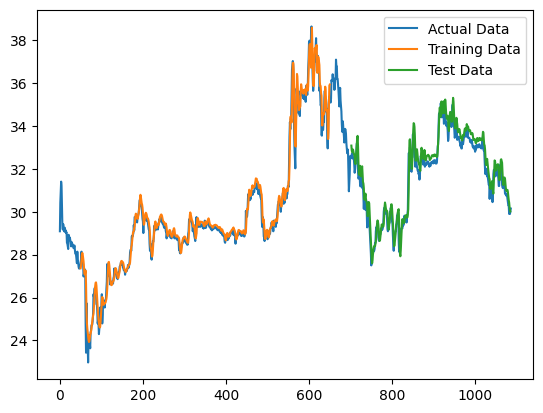

In [ ]:
# Now we are going to plot the Actual, training and testing data
look_back8 = 50
trainpredictplot8 = np.empty_like(sa)
trainpredictplot8[:, :] = np.nan
trainpredictplot8[look_back8:len(train_predict8)+look_back8, :] = train_predict8

testpredictplot8 = np.empty_like(sa)
testpredictplot8[:, :] = np.nan
testpredictplot8[len(train_predict8)+(look_back8*2)+1:len(sa)-1, :] = test_predict8

plt.plot(scaler.inverse_transform(sa), label='Actual Data')
plt.plot(trainpredictplot8, label='Training Data')
plt.plot(testpredictplot8, label='Test Data')
plt.legend()
plt.show()

In [ ]:
len(test_data8)

435

In [ ]:
x_input8 = test_data8[(len(test_data8)-look_back8):].reshape(1,-1)
x_input8

array([[0.50920849, 0.49963055, 0.53474936, 0.51559361, 0.51559361,
        0.47728237, 0.5060158 , 0.56029023, 0.57306073, 0.57306073,
        0.57306073, 0.57306073, 0.55390498, 0.57625329, 0.57306073,
        0.5634828 , 0.57306073, 0.56986804, 0.55709767, 0.54751973,
        0.52517155, 0.52517155, 0.55709767, 0.56029023, 0.58902379,
        0.56986804, 0.57944586, 0.57944586, 0.52836411, 0.52197886,
        0.5187863 , 0.53794192, 0.52517155, 0.52517155, 0.52517155,
        0.50282324, 0.50282324, 0.49963055, 0.49643799, 0.50282324,
        0.49643799, 0.48686018, 0.47728237, 0.46770443, 0.46770443,
        0.44216356, 0.44535625, 0.44216356, 0.45174137, 0.45812662]])

In [ ]:
temp_input8 = list(x_input8)
temp_input8 = temp_input8[0].tolist()
temp_input8

[0.5092084881214212,
 0.49963055463571426,
 0.5347493599101785,
 0.515593614727248,
 0.515593614727248,
 0.47728236793835355,
 0.5060158030300244,
 0.560290231698936,
 0.5730607284875562,
 0.5730607284875562,
 0.5730607284875562,
 0.5730607284875562,
 0.5539049833046257,
 0.5762532917904697,
 0.5730607284875562,
 0.5634827950018495,
 0.5730607284875562,
 0.5698680433961594,
 0.5570976683960225,
 0.5475197349103154,
 0.5251715482129549,
 0.5251715482129549,
 0.5570976683960225,
 0.560290231698936,
 0.5890237885790899,
 0.5698680433961594,
 0.5794458550933832,
 0.5794458550933832,
 0.5283641115158684,
 0.5219788631215581,
 0.5187862998186448,
 0.537941923213092,
 0.5251715482129549,
 0.5251715482129549,
 0.5251715482129549,
 0.5028232397271108,
 0.5028232397271108,
 0.49963055463571426,
 0.49643799133280075,
 0.5028232397271108,
 0.49643799133280075,
 0.48686017963557715,
 0.47728236793835355,
 0.46770443445264664,
 0.46770443445264664,
 0.4421635626638891,
 0.44535624775528593,
 0.44216

In [ ]:
# I am passing a function which will help us to find the predicted values for next 30 days and put them into an array.
lst_output8=[]
n_steps=50
i=0
while(i<30):

    if(len(temp_input8)>50):
        #print(temp_input8)
        x_input8=np.array(temp_input8[1:])
        print("{} day input {}".format(i,x_input8))
        x_input8=x_input8.reshape(1,-1)
        x_input8 = x_input8.reshape((1, n_steps, 1))
        #print(x_input8)
        yhat8 = model8.predict(x_input8, verbose=0)
        print("{} day output {}".format(i,yhat8))
        temp_input8.extend(yhat8[0].tolist())
        temp_input8=temp_input8[1:]
        #print(temp_input8)
        lst_output8.extend(yhat8.tolist())
        i=i+1
    else:
        x_input8 = x_input8.reshape((1, n_steps,1))
        yhat8 = model8.predict(x_input8, verbose=0)
        print(yhat8[0])
        temp_input8.extend(yhat8[0].tolist())
        print(len(temp_input8))
        lst_output8.extend(yhat8.tolist())
        i=i+1


print(lst_output8)

[0.46370268]
51
1 day input [0.49963055 0.53474936 0.51559361 0.51559361 0.47728237 0.5060158
 0.56029023 0.57306073 0.57306073 0.57306073 0.57306073 0.55390498
 0.57625329 0.57306073 0.5634828  0.57306073 0.56986804 0.55709767
 0.54751973 0.52517155 0.52517155 0.55709767 0.56029023 0.58902379
 0.56986804 0.57944586 0.57944586 0.52836411 0.52197886 0.5187863
 0.53794192 0.52517155 0.52517155 0.52517155 0.50282324 0.50282324
 0.49963055 0.49643799 0.50282324 0.49643799 0.48686018 0.47728237
 0.46770443 0.46770443 0.44216356 0.44535625 0.44216356 0.45174137
 0.45812662 0.46370268]
1 day output [[0.4735151]]
2 day input [0.53474936 0.51559361 0.51559361 0.47728237 0.5060158  0.56029023
 0.57306073 0.57306073 0.57306073 0.57306073 0.55390498 0.57625329
 0.57306073 0.5634828  0.57306073 0.56986804 0.55709767 0.54751973
 0.52517155 0.52517155 0.55709767 0.56029023 0.58902379 0.56986804
 0.57944586 0.57944586 0.52836411 0.52197886 0.5187863  0.53794192
 0.52517155 0.52517155 0.52517155 0.5028

In [ ]:
day_new8 = np.arange(1,51)
day_pred8 = np.arange(51,81)

In [ ]:
len(sa)

1087

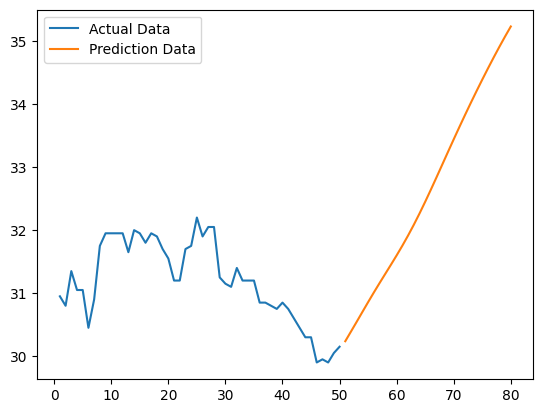

In [ ]:
# Now we are ging to plot the actual data and the predicted data for the next 30 days
plt.plot(day_new8,scaler.inverse_transform(sa[(len(sa)-look_back8):]), label='Actual Data')
plt.plot(day_pred8,scaler.inverse_transform(lst_output8), label='Prediction Data')
plt.legend()